# Day 2 module 3

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## lecture examples

In [2]:
employees = pd.read_csv('Files/Employee2.csv')

In [3]:
employees.Income.describe()

count      9.000000
mean     181.444444
std      135.246175
min       40.000000
25%       80.000000
50%      166.000000
75%      183.000000
max      450.000000
Name: Income, dtype: float64

In [4]:
employees.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   emp_id  10 non-null     int64  
 1   Gender  9 non-null      object 
 2   Age     9 non-null      float64
 3   Sales   10 non-null     int64  
 4   BMI     10 non-null     object 
 5   Income  9 non-null      float64
dtypes: float64(2), int64(2), object(2)
memory usage: 612.0+ bytes


In [5]:
employees.isnull().sum()

emp_id    0
Gender    1
Age       1
Sales     0
BMI       0
Income    1
dtype: int64

<Axes: >

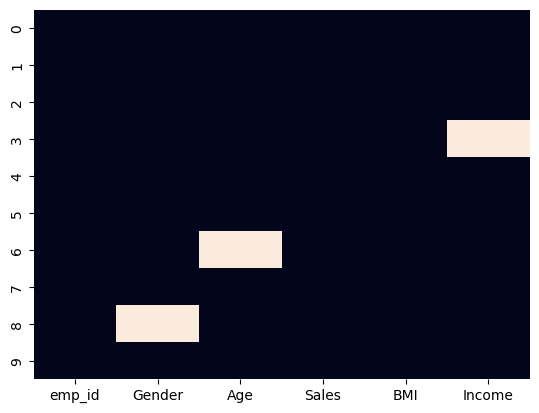

In [6]:
sns.heatmap(employees.isnull(),cbar=False)

In [7]:
df_num = employees.select_dtypes(include=['number'])
df_cat = employees.select_dtypes(exclude=['number'])
employees = df_num.fillna(df_num.mean())


<Axes: >

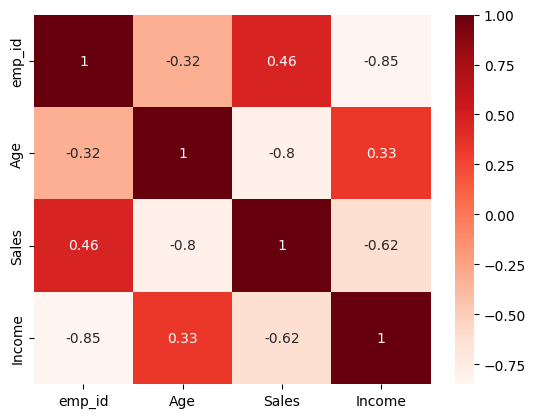

In [8]:
sns.heatmap(df_num.corr(),cmap='Reds',annot=True)

<Axes: >

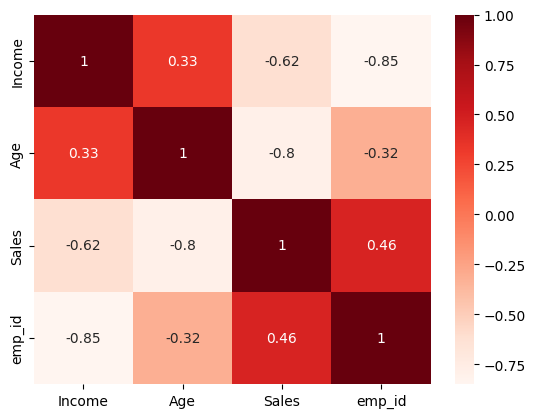

In [9]:
k = len(employees)
cols = df_num.corr().nlargest(k, 'Income')['Income'].index
cm = df_num[cols].corr()
sns.heatmap(cm,annot=True,cmap='Reds')

In [10]:
df = pd.read_csv('Files/HousePrices.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<Axes: >

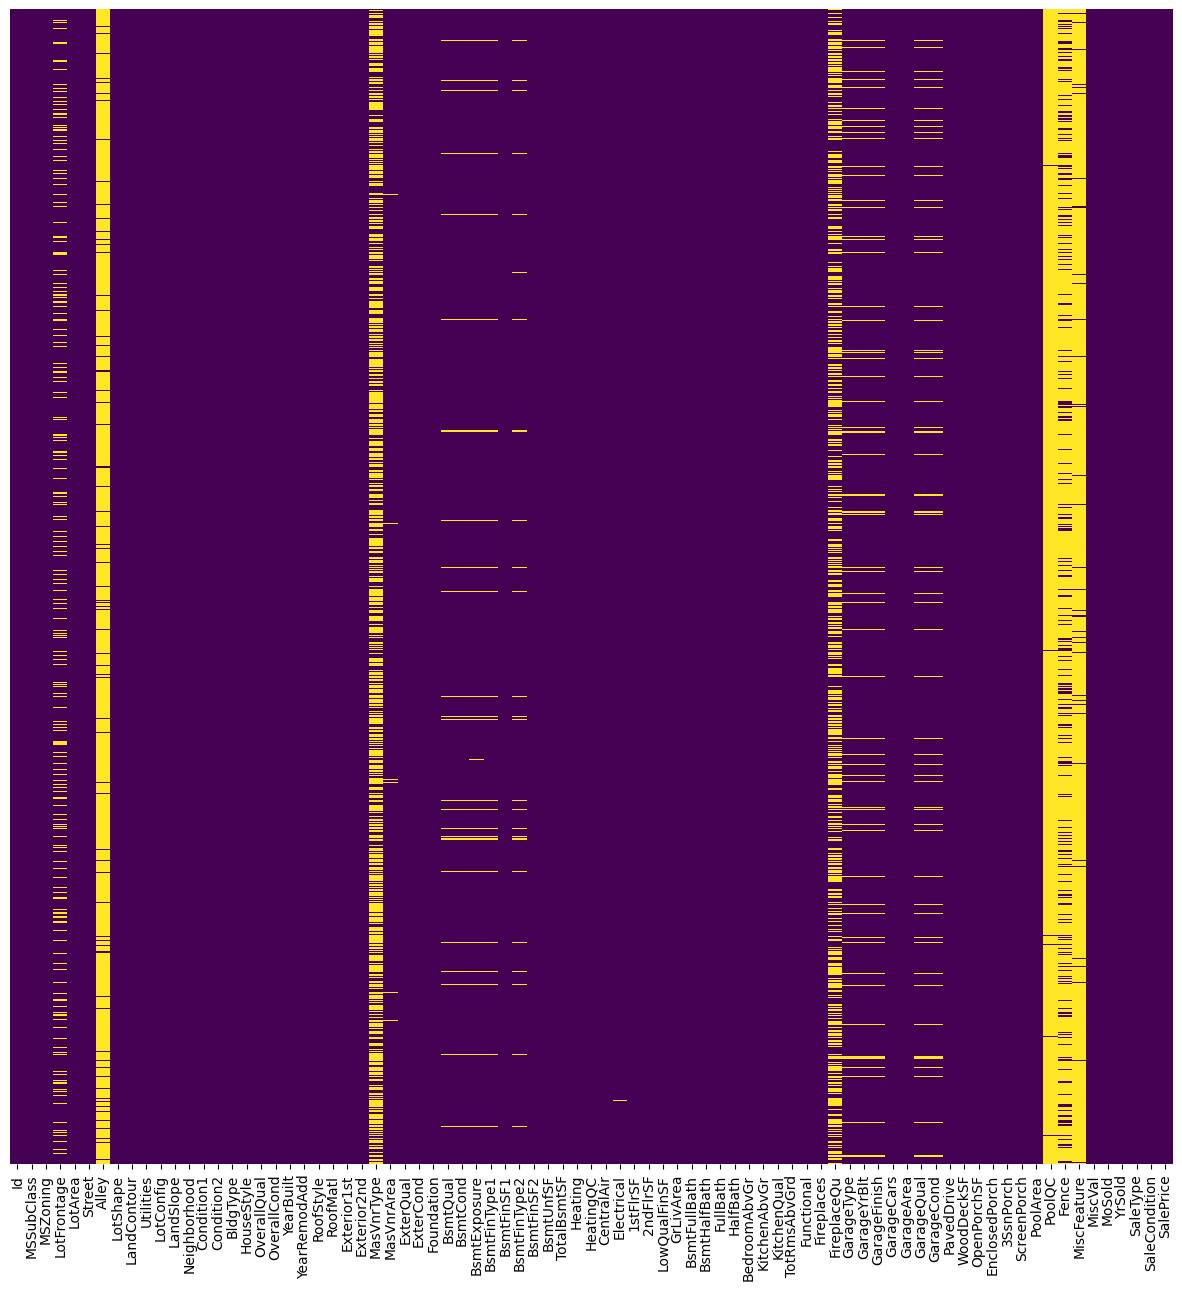

In [12]:
plt.subplots(figsize=(15,15))
sns.heatmap(df.isnull(),cbar=False,yticklabels=False,cmap='viridis')

In [13]:
df2 = df [[column for column in df if df[column].count()/len(df) >= 0.5]]
del df2['Id']
df = df2

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 2000x2000 with 0 Axes>

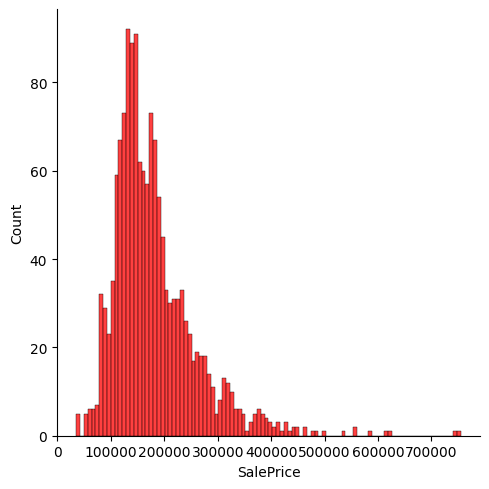

In [14]:
print(df['SalePrice'].describe())
plt.figure(figsize=(20,20))
sns.displot(df['SalePrice'],color='r',bins=100)

In [15]:
df_num = df.select_dtypes(include=['float64','int64'])
len(df_num.columns)

37

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

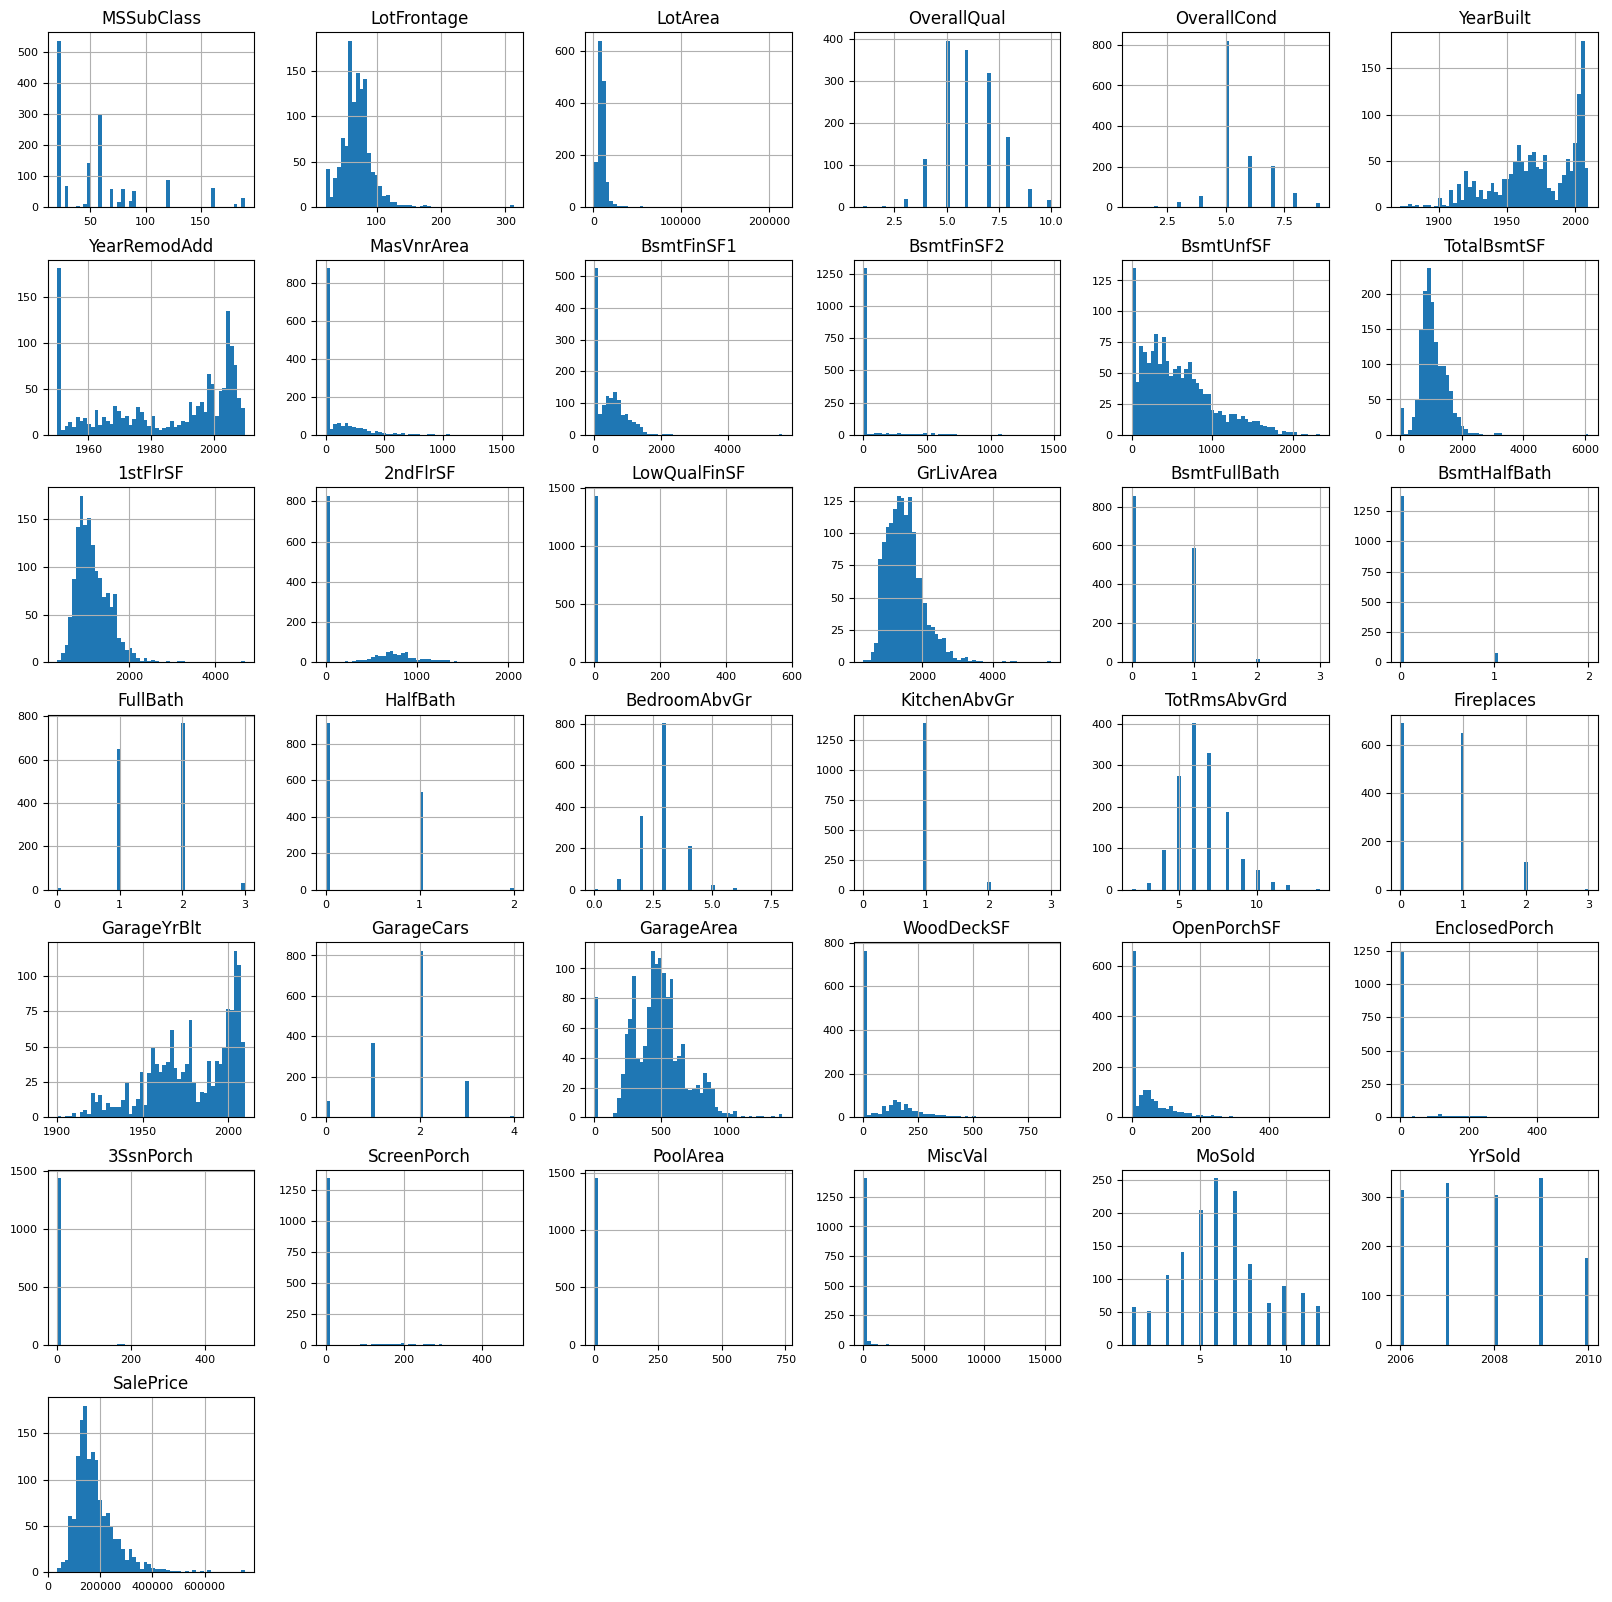

In [16]:
df_num.hist(figsize=(20,20),bins=50,xlabelsize=8,ylabelsize=8)

In [17]:
df_num_corr = df_num.corr()['SalePrice']
slected_features =df_num_corr[abs(df_num_corr>0.5)].sort_values(ascending=False)
slected_features

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

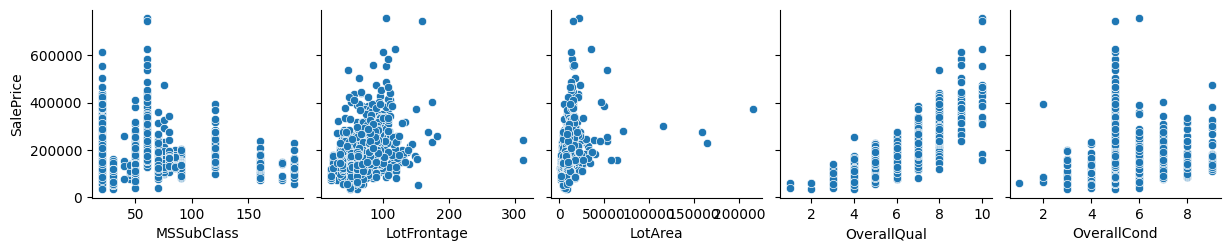

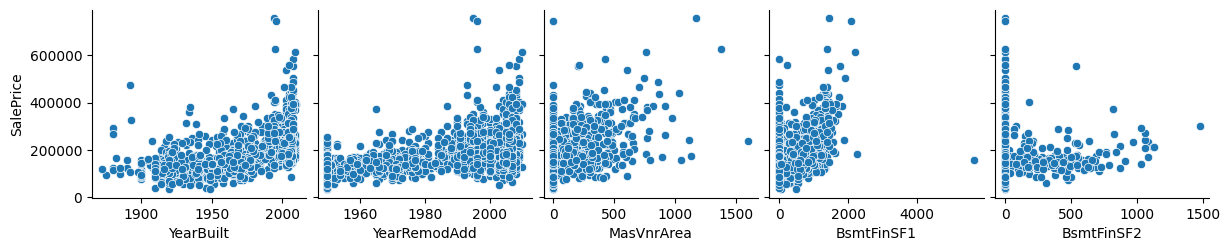

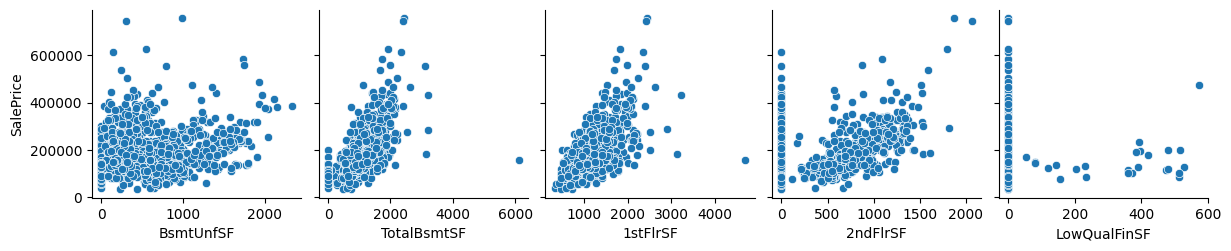

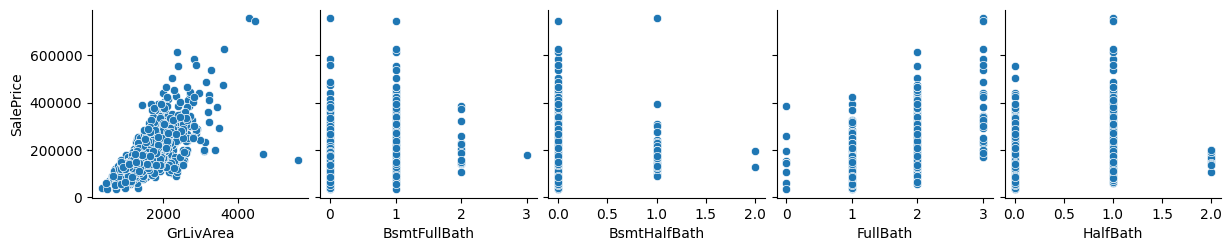

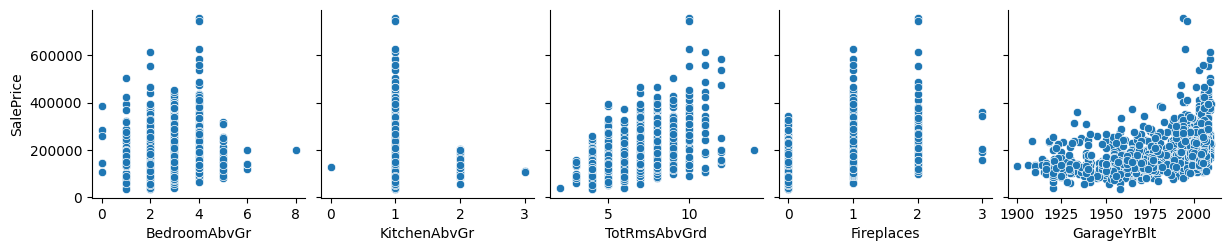

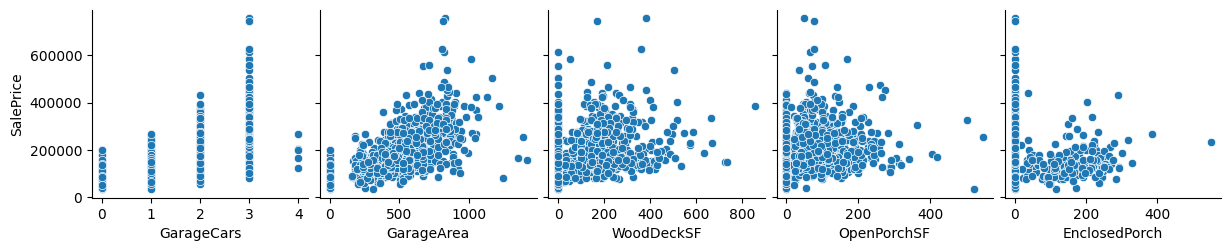

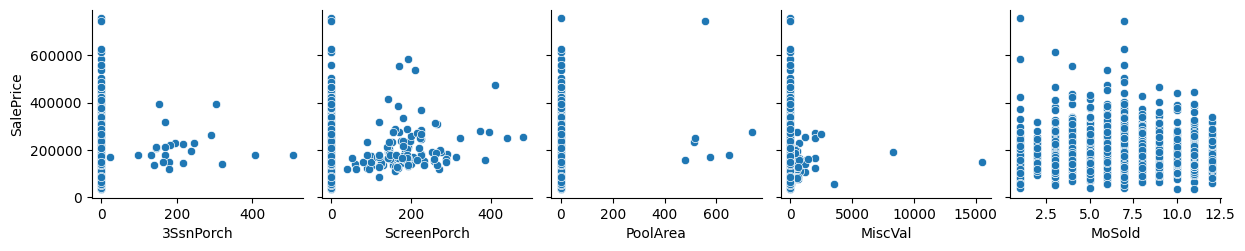

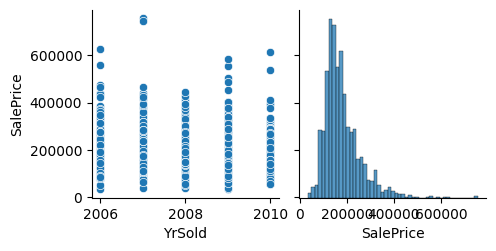

In [18]:
for i in range(0, len(df_num.columns),5):
    sns.pairplot(data = df_num,x_vars= df_num.columns[i:i+5],y_vars=['SalePrice'])

<Axes: >

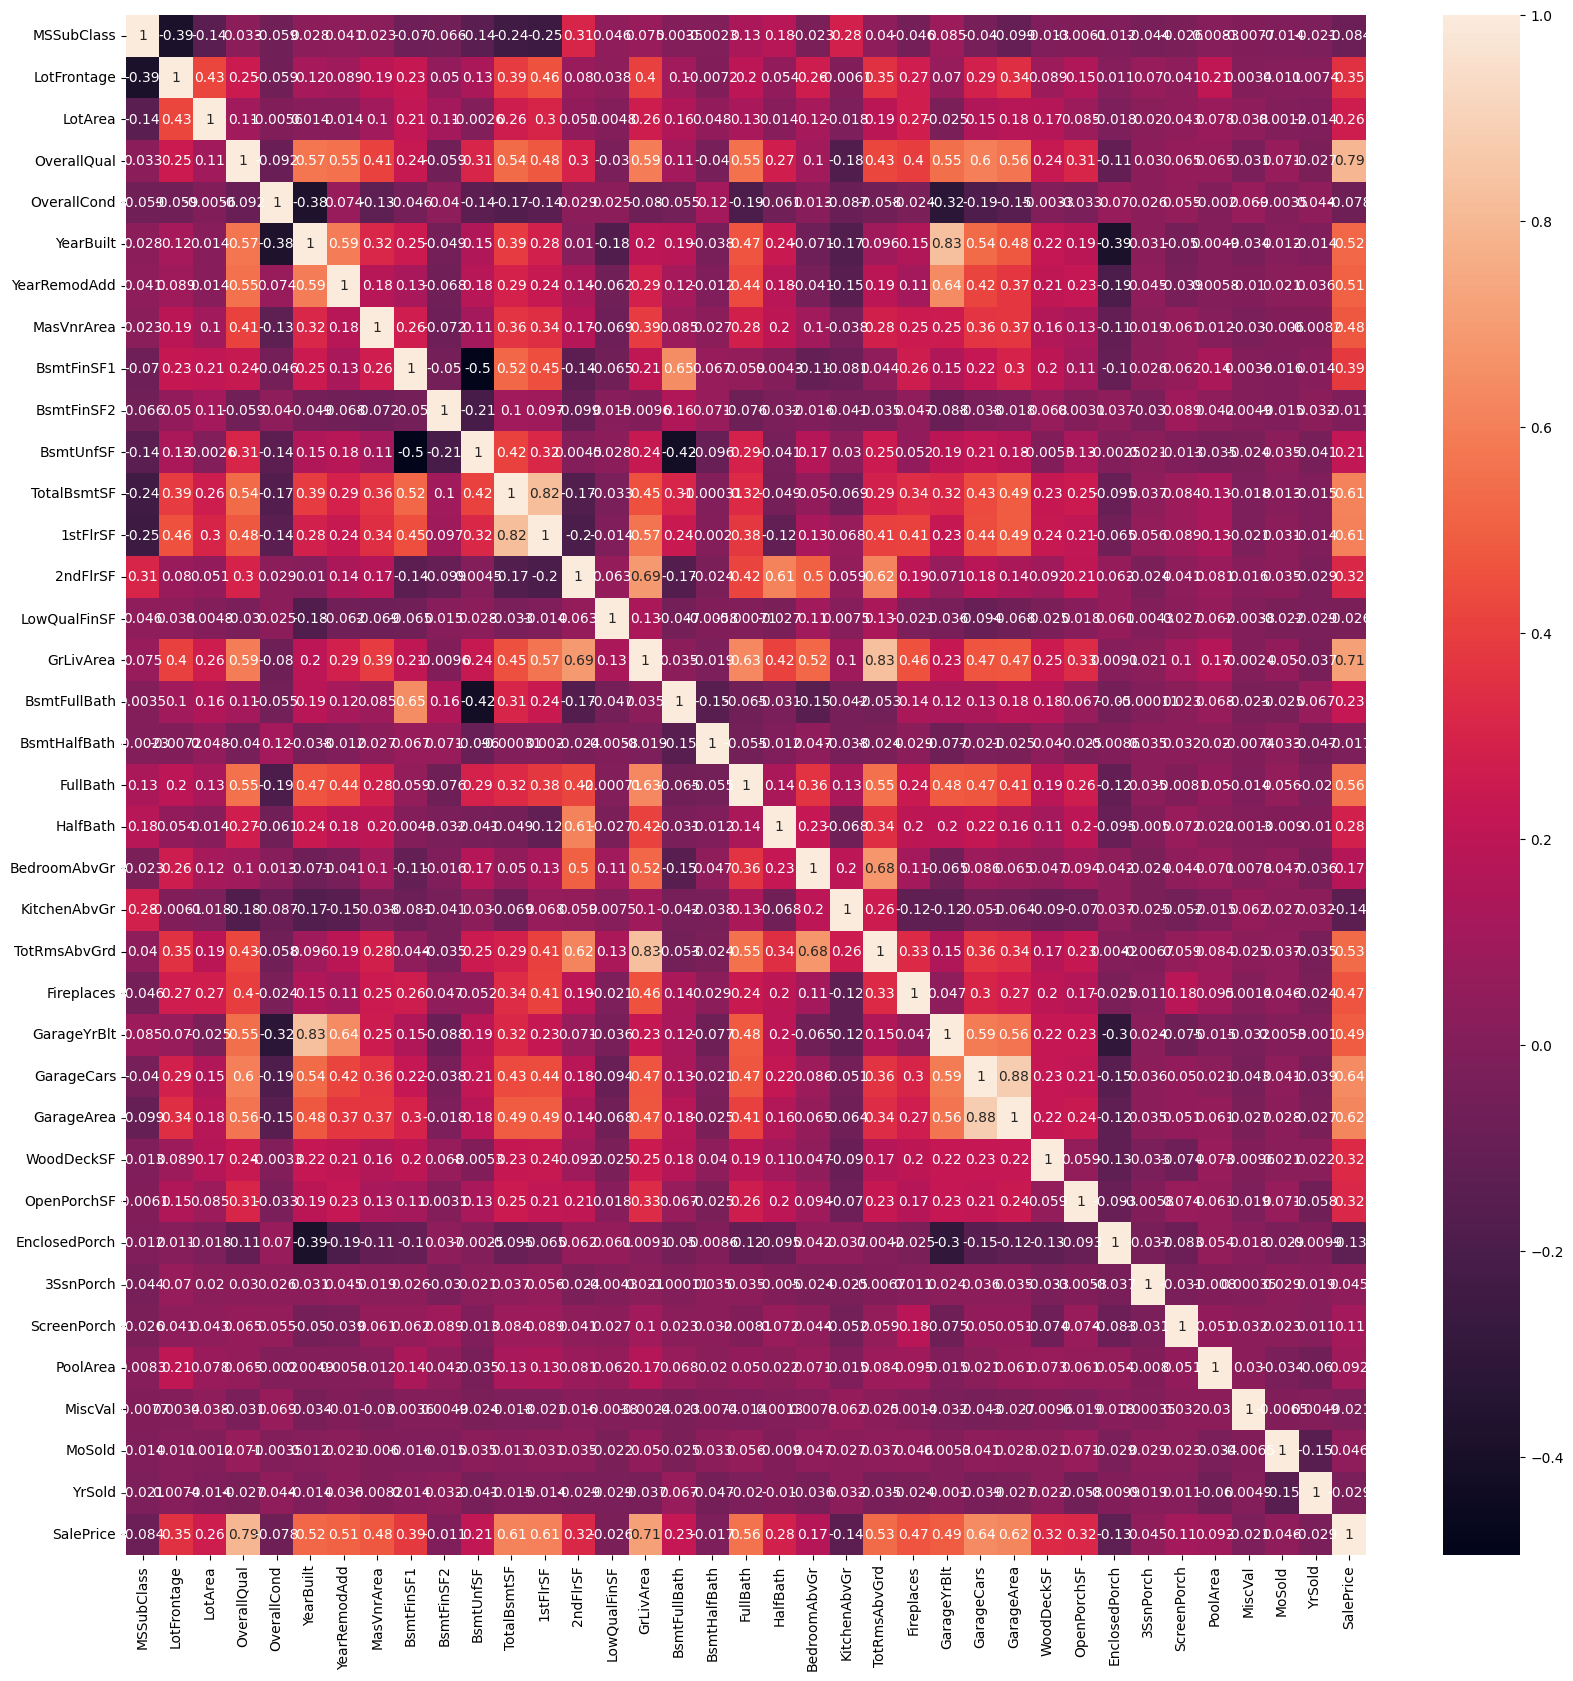

In [19]:
import numpy as np
corr = df_num.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corr ,annot=True)

/var/folders/t4/n7hmgl3x4t37tfbxfbczj19m0000gn/T/ipykernel_98522/2763338520.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['BsmtExposure'],y=df['SalePrice'],palette='Set1')


<Axes: xlabel='BsmtExposure', ylabel='SalePrice'>

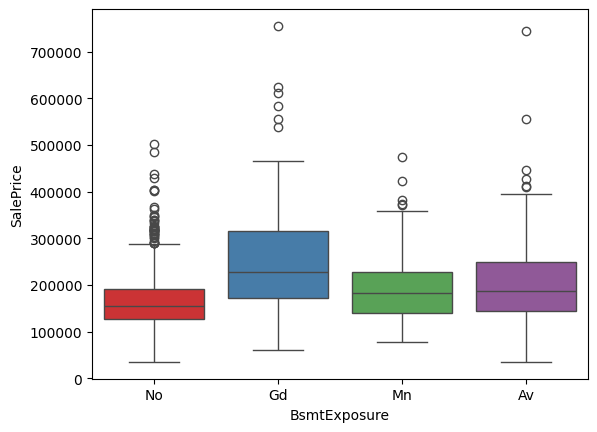

In [20]:
sns.boxplot(x=df['BsmtExposure'],y=df['SalePrice'],palette='Set1')

/var/folders/t4/n7hmgl3x4t37tfbxfbczj19m0000gn/T/ipykernel_98522/844654556.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['SaleCondition'],y=df['SalePrice'],palette='Set1')


<Axes: xlabel='SaleCondition', ylabel='SalePrice'>

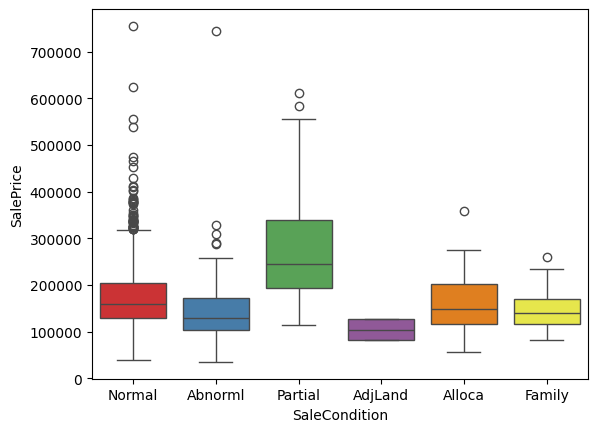

In [21]:
sns.boxplot(x=df['SaleCondition'],y=df['SalePrice'],palette='Set1')

In [22]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context

## Exc

## Q1

In [23]:
import seaborn as sns
iris = sns.load_dataset("iris")

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [25]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [26]:
iris = iris.drop_duplicates()

In [27]:
iris.select_dtypes(include=['number']).corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.118129,0.873738,0.820620
sepal_width,-0.118129,1.000000,-0.426028,-0.362894
petal_length,0.873738,-0.426028,1.000000,0.962772
petal_width,0.820620,-0.362894,0.962772,1.000000


In [42]:
list_of_features = iris.select_dtypes(include=['number']).columns

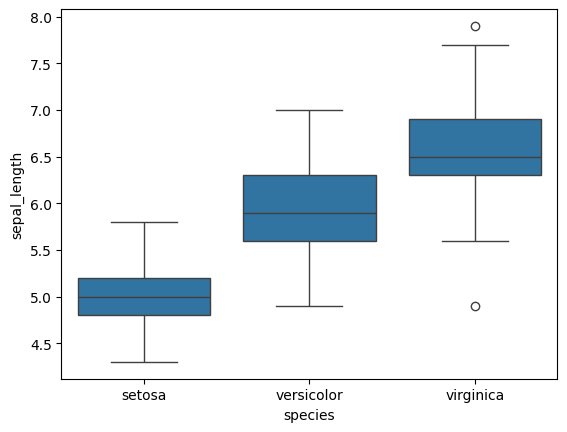

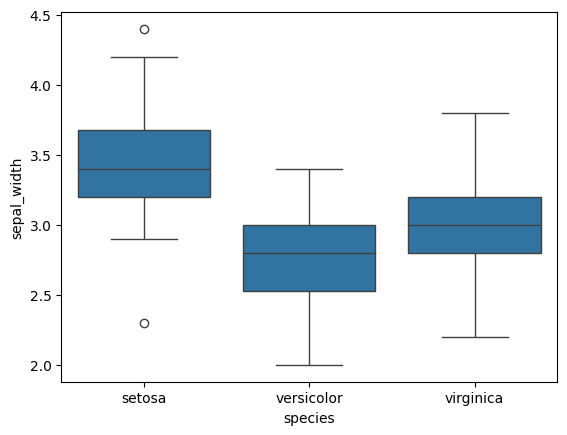

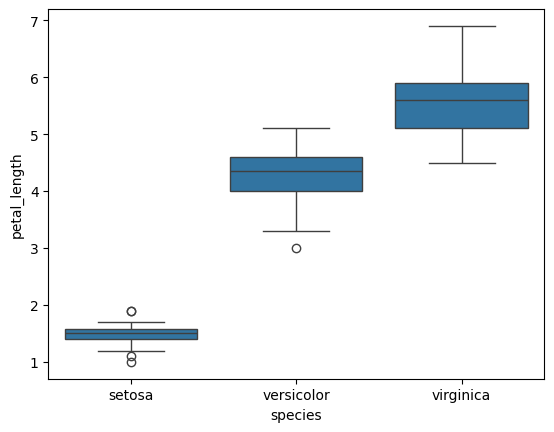

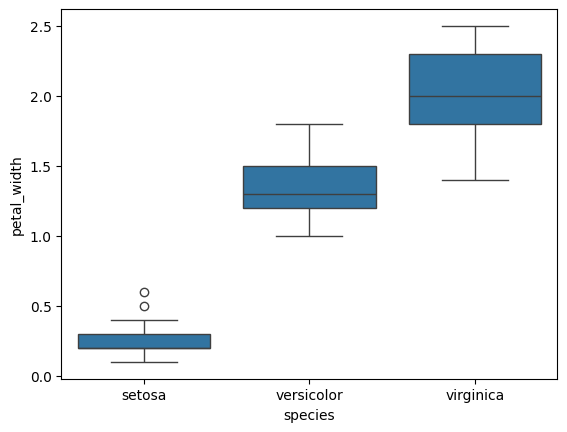

In [45]:
for i in range(0,len(list_of_features)):    
    sns.boxplot(x=iris['species'],y=iris[list_of_features[i]])
    plt.show()

## Q2

In [50]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
cancer_data = datasets.load_breast_cancer()
x = cancer_data.data
y = cancer_data.target 
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [51]:
x

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [49]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [30]:
np.shape(x)

(569, 30)

In [31]:
np.shape(y)

(569,)

In [32]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=(0.5))
np.shape(sel.fit_transform(x))

(569, 10)

In [55]:
from sklearn.feature_selection import SelectKBest,f_classif
fit=SelectKBest(f_classif, k=2)
X_new = fit.fit_transform(x, y)
print(np.shape(X_new))
print(fit.scores_)


(569, 2)
[6.46981021e+02 1.18096059e+02 6.97235272e+02 5.73060747e+02
 8.36511234e+01 3.13233079e+02 5.33793126e+02 8.61676020e+02
 6.95274435e+01 9.34592949e-02 2.68840327e+02 3.90947023e-02
 2.53897392e+02 2.43651586e+02 2.55796780e+00 5.32473391e+01
 3.90144816e+01 1.13262760e+02 2.41174067e-02 3.46827476e+00
 8.60781707e+02 1.49596905e+02 8.97944219e+02 6.61600206e+02
 1.22472880e+02 3.04341063e+02 4.36691939e+02 9.64385393e+02
 1.18860232e+02 6.64439606e+01]


In [54]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x, y)
print(selector.ranking_)

estimator = DecisionTreeClassifier()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(x, y)
print(selector.ranking_)

[ 9 17  1  2 25  8  3 13 27 21  6 22 15  5 18 26  4 10 14 20  1 23 16  1
 11  7 24 28 19 12]
[28 19 23 22 15 18 16  2 17 14 11 24 25  5  9 20 21 13 12 10  1  1  7  4
  3  6  8  1 26 27]


In [90]:
from sklearn.decomposition import PCA
pca = PCA(0.95)
componenets = pca.fit_transform(x)
pd_df = pd.DataFrame(data=componenets)
pd_df['label'] = y

In [91]:
print(pca.explained_variance_ratio_.sum())

0.9515688143366667


In [92]:
pd_df

,0,1,2,3,4,5,6,7,8,9,label
0,9.192837,1.948583,-1.123166,3.633731,-1.195110,1.411424,2.159370,-0.398407,-0.157118,-0.877402,0
1,2.387802,-3.768172,-0.529293,1.118264,0.621775,0.028656,0.013358,0.240988,-0.711905,1.106995,0
2,5.733896,-1.075174,-0.551748,0.912083,-0.177086,0.541452,-0.668166,0.097374,0.024066,0.454275,0
3,7.122953,10.275589,-3.232790,0.152547,-2.960878,3.053422,1.429911,1.059565,-1.405440,-1.116975,0
4,3.935302,-1.948072,1.389767,2.940639,0.546747,-1.226495,-0.936213,0.636376,-0.263805,0.377704,0
...,...,...,...,...,...,...,...,...,...,...,...
564,6.439315,-3.576817,2.459487,1.177314,-0.074824,-2.375193,-0.596130,-0.035471,0.987929,0.256989,0
565,3.793382,-3.584048,2.088476,-2.506028,-0.510723,-0.246710,-0.716326,-1.113360,-0.105207,-0.108632,0
566,1.256179,-1.902297,0.562731,-2.089227,1.809991,-0.534447,-0.192758,0.341887,0.393917,0.520877,0
567,10.374794,1.672010,-1.877029,-2.356031,-0.033742,0.567936,0.223082,-0.280239,-0.542035,-0.089296,0
